# Exploratory Data Analysis (EDA)
## Early Stage Diabetes Risk Prediction Dataset

###  Objective
In this notebook, we will explore the dataset to understand the distribution of features, identify missing values, and analyze the relationship between symptoms (like Polyuria, Age) and the target variable (Diabetes Class).

###  Dataset Overview
* **Source:** UCI Machine Learning Repository (Sylhet Diabetes Hospital).
* **Rows:** 520
* **Columns:** 17 (1 Numerical, 15 Categorical, 1 Target).
* **Target:** `class` (Positive/Negative).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add the parent directory to the path so we can import from 'utils'
sys.path.append(os.path.abspath('..'))
from utils.visualization import *

# Initialize global styles from the .py file
setup_styles()

# Load Data
df = pd.read_csv('../data/raw/diabetes_data_upload.csv')

# Display basic info
display(df.head())
print(f"Shape of data: {df.shape}")

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Shape of data: (520, 17)


## 1. Dataset Structure

In [2]:
# Check data types and missing values
df.info()

print("\n--- Missing Values Check ---")
print(df.isnull().sum().sum(), "total missing values detected.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

### Interpretation
* **Missing Values:** None. The dataset is clean (0 nulls in all columns).
* **Data Types:** Correctly identified. `Age` is integer, and all other features are `object` (strings like "Yes"/"No").
* **Decision:** No imputation (filling missing values) is required. We can proceed directly to Encoding and Scaling.

## 2. Check for duplicates

In [2]:
# Check for duplicates
check_duplicates(df)

Number of duplicate rows: 269
Duplicate rows found. Displaying first 5:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
159,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
162,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive


### interpretation

**Observation:**
Our analysis detected **269 duplicate rows** out of 520 total samples (approximately 51.7% of the dataset).

**Root Cause Analysis:**
The high number of duplicates suggests that the original dataset likely underwent **artificial upsampling** (repeating rows to increase size) or that the finite number of "Yes/No" combinations resulted in identical patient profiles.

**Methodological Decision: REMOVE DUPLICATES**
We have decided to **drop all duplicate rows**, reducing the dataset to 251 unique patient records. We chose this strict approach for three key reasons:

1.  **Prevent Data Leakage:** If identical rows exist in both the Training and Testing sets, the model can "memorize" the patient instead of learning the symptoms. This would artificially inflate our accuracy scores (e.g., scoring 98% because it already saw the answers).
2.  **Scientific Rigor:** We want to evaluate how well the model generalizes to *unique* patient profiles, not how well it recognizes repeated patterns from the training data.
3.  **Bias Removal:** If the duplicates were created artificially, they might bias the model toward specific, common examples. Removing them forces the model to learn from the underlying rules of the disease.

**Impact:**
We acknowledge that training on a smaller dataset (~250 rows) makes the task harder and may lower our final accuracy metrics, but the resulting performance will be a **more honest and realistic** representation of the model's capabilities.

## 3. Target Distribution (Univariate Analysis)
Is the dataset balanced? Let's visualize the ratio of Positive vs. Negative cases.

/home/donia/Early Stage Diabetes Risk Prediction/utils/visualization.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


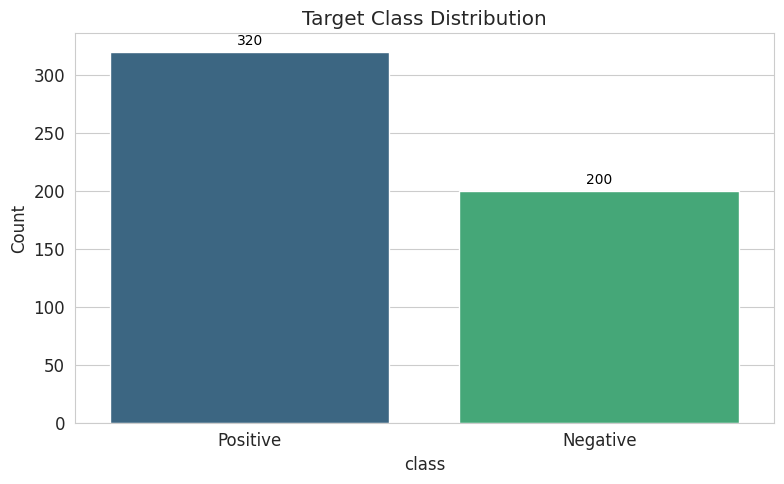

In [3]:
# Visualize the target distribution (Positive vs. Negative)
plot_distribution(df, column='class', title='Target Class Distribution')

### Interpretation
#### Class Balance (Target Variable)
* **Observation:**
    * Positive (Diabetic): **61.54%** (320 patients)
    * Negative (Healthy): **38.46%** (200 patients)
* **Interpretation:** The dataset is slightly "imbalanced". There are *more* sick patients than healthy ones. This is common in hospital datasets (people usually go to the hospital when they are sick).
* **Decision:** The imbalance is not severe (approx 60/40). We **do not** need to apply SMOTE or aggressive resampling techniques. The model will learn fine on this distribution.

## 4. Numerical Analysis: Age
`Age` is our only numerical feature. Let's look at its distribution and check for outliers.

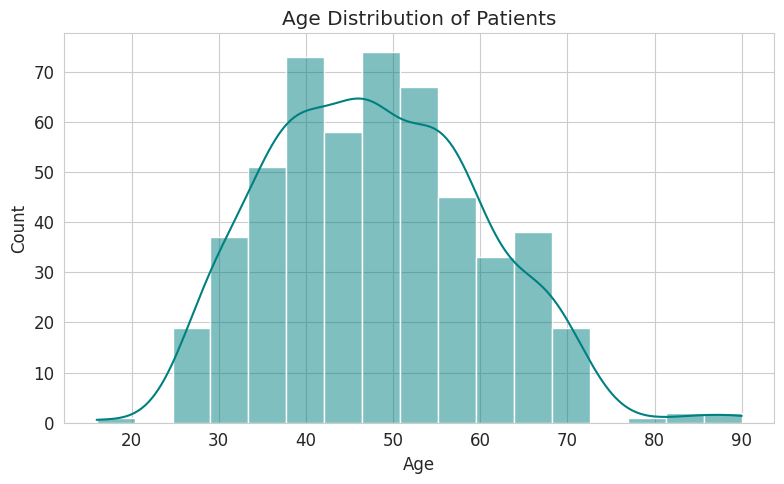

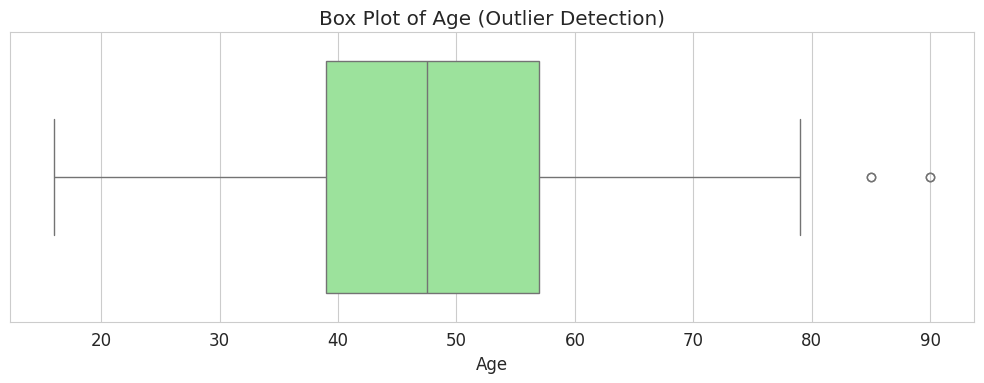

In [8]:
#  Distribution (Histogram + KDE)
plot_distribution(df, column='Age', title='Age Distribution of Patients')
# 2. Outlier Check (Box Plot)
plot_outlier_check(df, column='Age')

### Interpretation
* **Observation:** The Box Plot shows significant overlap between the Age ranges of Diabetic vs. Healthy patients.
* **Interpretation:** Age alone is **not** a strong predictor in this dataset. Young people in this group also have diabetes.
* **Decision:** We must still keep it, but we **must apply Scaling** (StandardScaler) so that Age (values like 20-90) doesn't overpower the binary features (0-1).

## 5. Bivariate Analysis: Age vs. Diabetes
Do older people tend to have a higher risk of Diabetes in this dataset?

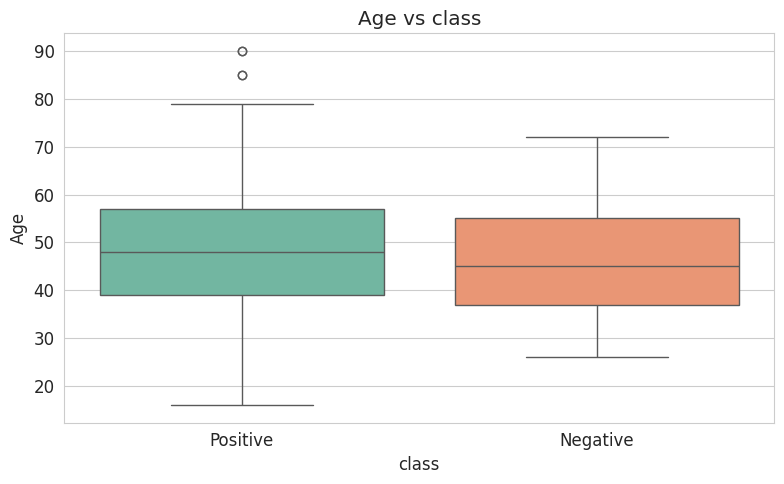

In [4]:
# Analyze relationship between Age and Diabetes
plot_numerical_vs_target(df, col='Age', target='class')

### Interpretation: Age vs. Diabetes
* **Observation:** The box plots for Positive and Negative cases are nearly identical in position and spread.
* **Insight:** Unlike many other diabetes datasets where age is a dominant factor, in this "Early Stage" dataset, age is **not a strong separator**. Young people are just as likely to be positive as older people in this specific case.
* **Decision:**
    * **Keep the Feature:** We will not drop `Age` because it may still provide value when combined with other symptoms (interaction effects).
    * **Scaling Required:** Since the range is vastly different from the 0/1 categorical features, we **must apply StandardScaler** to prevent it from dominating the distance calculations in models like KNN or SVM.

## 6. Categorical Analysis: Symptoms vs. Diabetes
Since most features are "Yes/No", we will use **Count Plots** to see how often each symptom occurs in diabetic vs. healthy patients.

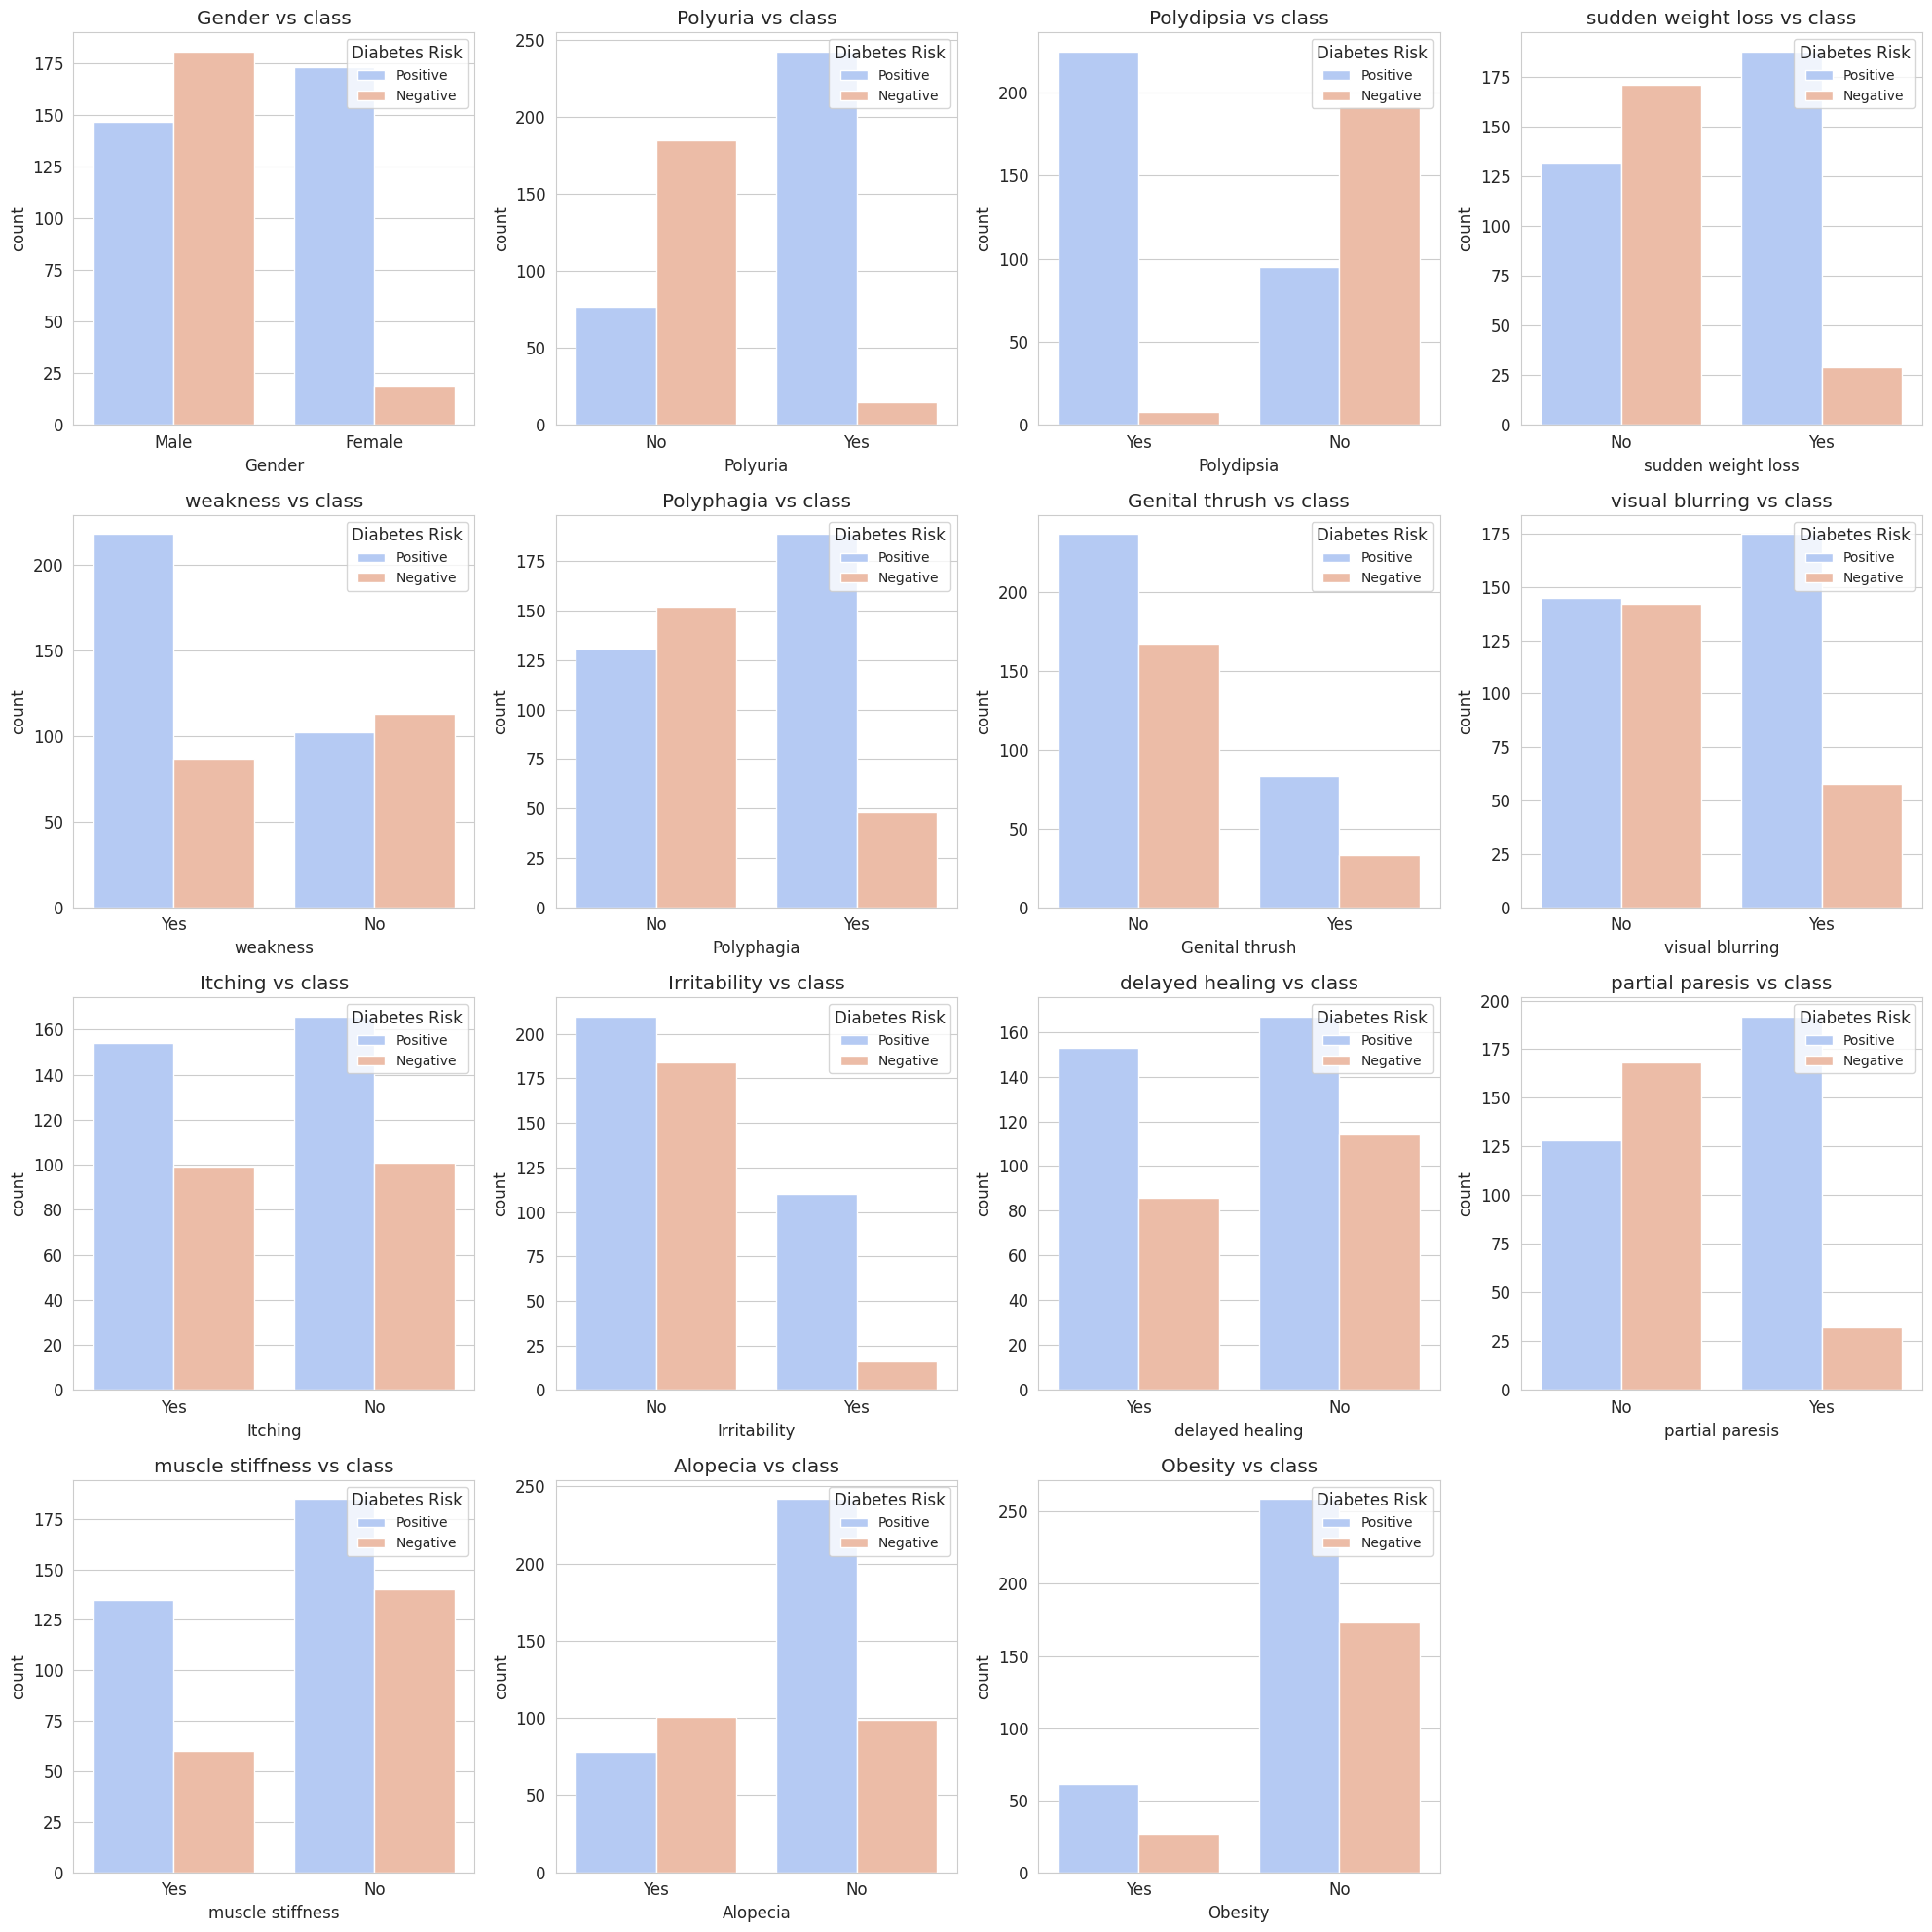

In [2]:
# Visualize relationships between all categorical symptoms and Diabetes Class
plot_categorical_grid(df, target='class', exclude_cols=['Age'])

### Interpretation: Categorical Symptoms

* **Top Predictors:** `Polyuria` (Excessive Urination) and `Polydipsia` (Excessive Thirst) show the clearest separation. A patient with these symptoms has a very high probability of testing positive.

* **Critical Finding: Gender Bias:**
    The `Gender` plot reveals a significant imbalance: in this specific dataset, nearly all female patients are diabetic, while male patients are more balanced.
    * **The Risk:** If we include `Gender` as a feature, the model will learn a statistical shortcut: *"If Female, then Diabetic."*
    * **The Consequence:** This would lead to **False Positives**, where the model assigns a high risk to healthy women solely based on their gender, ignoring their actual symptoms.

* **Weak Features:** `Itching`, and `Delayed Healing` show less distinct separation, suggesting they are weaker predictors on their own.

* **Decision:**
    * **Drop Gender:** To prevent demographic bias and ensure the model relies **only on clinical symptoms**, we will **remove the `Gender` column** from the training data.
    * **Feature Engineering:** We will encode all remaining symptoms to Binary (0/1).
    * **Keep Weak Features:** We will **NOT drop** features like Obesity yet. In machine learning, weak features can become strong predictors when combined with others (interaction effects).

## 7. Correlation Heatmap
To generate a Heatmap, we must first temporarily encode the text values into numbers (Yes=1, No=0).

/tmp/ipykernel_24633/3693216528.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace(mapping)


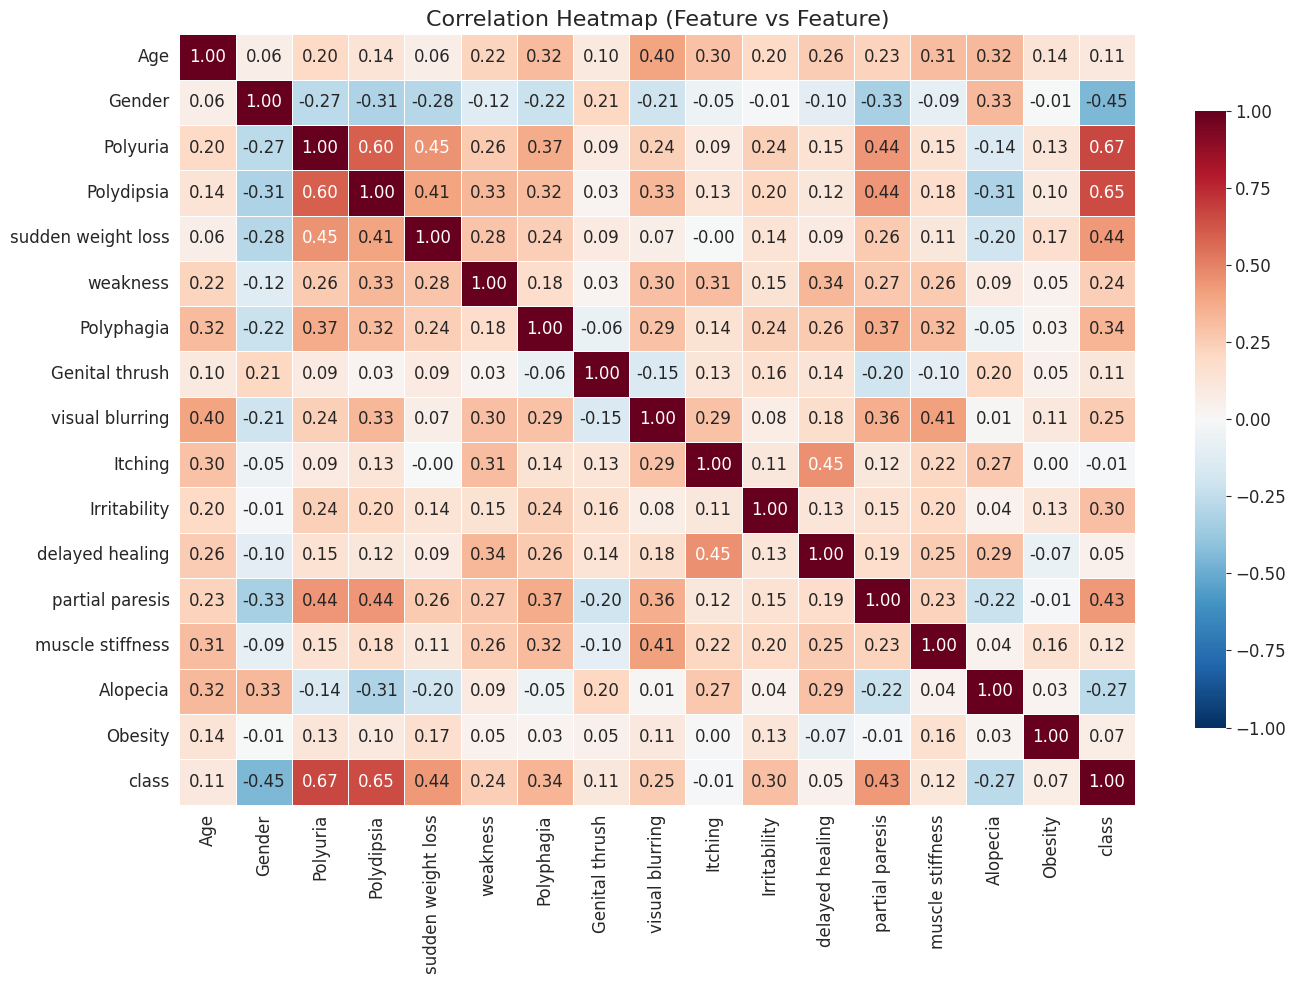

/home/donia/Early Stage Diabetes Risk Prediction/utils/visualization.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos.values, y=top_pos.index, palette='rocket')


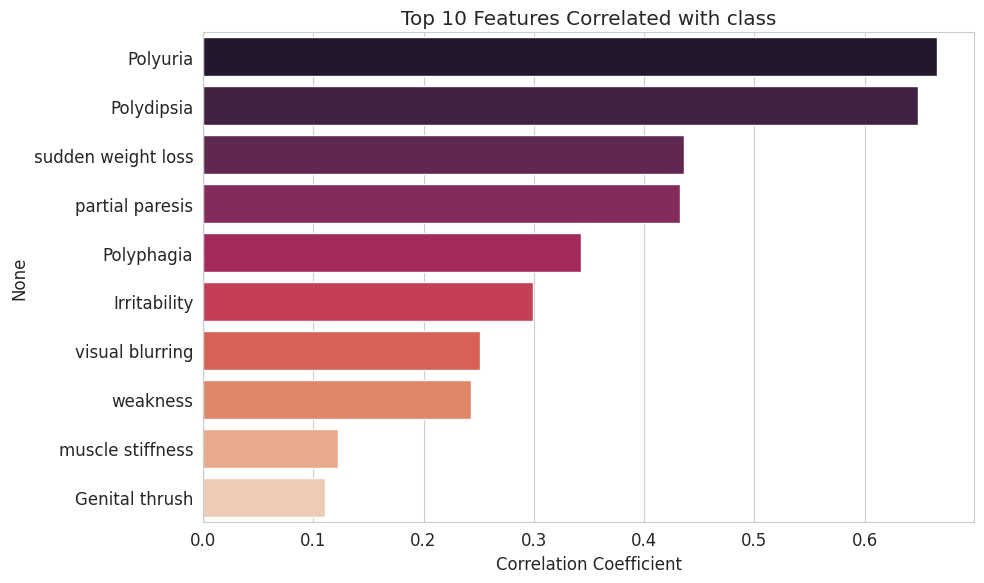

In [6]:
# 1. Create a temporary encoded dataframe
df_encoded = df.copy()

# Mapping logic
mapping = {
    'Yes': 1, 'No': 0,
    'Positive': 1, 'Negative': 0,
    'Male': 1, 'Female': 0
}
df_encoded = df_encoded.replace(mapping)

# 2. Plot the Heatmap (Now using your preferred RdBu_r style)
plot_correlation_heatmap(df_encoded)

# 3. Show specific correlations
plot_target_correlations(df_encoded, target='class', k=10)

###  Heatmap Analysis:
* **Positive Correlation (Red):** Features closer to `1.0` with `class` move together. (e.g., If Polyuria is 1, Diabetes is likely 1).
* **Negative Correlation (Blue):** Features closer to `-1.0` move opposite.
* **Multicollinearity:** If two features (like Polyuria and Polydipsia) have a very high correlation with *each other* (e.g., > 0.8), they provide duplicate information.

## 8. Features Correlation

In [3]:
top_pairs = check_correlations(df, threshold=0.4)

 CALCULATING FEATURE CORRELATIONS...

 Top Correlations (> 0.4):
----------------------------------------
Polyuria            class                 0.665922
Polydipsia          class                 0.648734
Polyuria            Polydipsia            0.598609
Itching             delayed healing       0.453316
Gender              class                 0.449233
Polyuria            sudden weight loss    0.447207
Polydipsia          partial paresis       0.442249
Polyuria            partial paresis       0.441664
sudden weight loss  class                 0.436568
partial paresis     class                 0.432288
visual blurring     muscle stiffness      0.412369
Polydipsia          sudden weight loss    0.405965
Age                 visual blurring       0.402729
dtype: float64

 GUIDE:
• > 0.90: Redundant features (Drop one).
• > 0.60: Strong predictors or interaction effects (Keep both).


### Interpretation

**1. The "Super-Features" (Primary Predictors)**
The analysis confirms that **Fluid Balance** symptoms are the dominant drivers of the disease in this dataset:
* **`Polyuria` (0.67)** and **`Polydipsia` (0.65)** have the strongest correlation with the target (`class`).
* **Insight:** Any patient presenting with this specific pair of symptoms should be flagged as "High Risk" immediately.

**2. Secondary Risk Factors**
Beyond thirst and urination, two other symptoms showed moderate predictive power:
* **`Sudden Weight Loss` (0.44)**
* **`Partial Paresis` (0.43)**
* **Insight:** These are critical "confirmatory" symptoms. If a patient has Polyuria *and* Sudden Weight Loss, the diagnosis is almost certain.

**3. Physiological Clusters & Multicollinearity**
We detected logical clusters where symptoms tend to appear together:
* **The "Diabetes Syndrome":** `Polyuria` vs `Polydipsia` (**0.60**)
    * *Decision:* The correlation is strong (expected medically) but below the redundancy threshold (0.90). We **KEEP BOTH** to capture the combined signal.
* **The "Skin Cluster":** `Itching` vs `Delayed Healing` (**0.45**)
    * *Observation:* Patients with high blood sugar often suffer from both.
* **The "Aging Cluster":** `Age` vs `Visual Blurring` (**0.40**)
    * *Observation:* Older patients report more vision issues, which is a natural physiological correlation independent of diabetes.

**4. Bias Confirmation: The Gender Trap**
* **`Gender` vs `class` (0.45)**
* **Critical Finding:** Gender is the **5th strongest predictor** in the entire dataset, outranking actual symptoms like Visual Blurring or Age.
* **Action:** This is scientifically unsound (diabetes is not a "gendered" disease to this extent). It confirms our decision to **DROP the Gender column** to prevent the model from learning a sampling bias.

## 8. Final Decisions for Data Preparation
Based on the comprehensive EDA, we have established the following strategy for our Data Preparation pipeline (`02_data_preparation.ipynb`):

### 1. Data Cleaning (Duplicates & Missing Values)
* **Finding:** The dataset contains **0 missing values**, but we detected **269 duplicate rows** (51.7% of data).
* **Decision:**
    * **Missing Values:** No imputation is required.
    * **Duplicates:** We will **DROP all duplicate rows**. Although this reduces our dataset size significantly (to ~251 rows), it is a necessary step to prevent **Data Leakage**. If we kept them, identical patients could appear in both the Training and Test sets, causing the model to falsely memorize answers rather than learning symptoms.

### 2. Feature Scaling (Numerical)
* **Finding:** `Age` ranges from roughly 16 to 90, whereas all other features will be 0 or 1.
* **Decision:** We **must apply Scaling** (StandardScaler) to the `Age` column. This prevents the large age values from dominating distance-based algorithms (like KNN or SVM) during training.

### 3. Feature Encoding (Categorical)
* **Finding:** 15 out of 16 features are categorical strings (`"Yes"`, `"No"`, `"Male"`, `"Female"`).
* **Decision:** We will apply **Binary Encoding** (mapping Positive/Yes/Male → 1 and Negative/No/Female → 0).
    * *Note:* Since all categories are strictly binary, we do not need complex One-Hot Encoding with multiple columns per feature; simple binary mapping is sufficient and efficient.

### 4. Class Imbalance Strategy
* **Finding:** The target split is roughly **60% Positive** vs **40% Negative**.
* **Decision:** This is a "mild" imbalance. It does not require aggressive resampling techniques like SMOTE. We will accept the distribution as-is, but we will monitor the **Recall** metric closely during evaluation to ensure we are not missing positive cases.

### 5. Feature Selection
* **Finding:** `Polyuria` and `Polydipsia` are massive predictors (Correlation > 0.6). Features like `Obesity` and `Itching` are weak predictors.
* **Decision:** We will **retain ALL features** for the initial model training. We want to see if the "weak" features add value when combined with others (interaction effects) before deciding to drop them.

### 6. Bias Mitigation
* **Finding:** Our analysis revealed a critical bias in the `Gender` column. The data contains almost no examples of healthy women, leading the model to assign a near-100% risk score to females regardless of their symptoms.
* **Decision:** We will remove the `Gender` column entirely. This is an ethical and technical decision to prevent the model from learning `"Female = Diabetic"` as a shortcut. The model must rely solely on clinical symptoms.